## Overview

Working with a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. I will be performing text classification while building a Recurrent Neural Network (RNN). This dataset contains the following columns:

* Clothing ID
* Age
* Title
* Review Text
* Rating
* Recommended IND
* Positive Feedback Count
* Division Name
* Department Name
* Class Name

### Loading the data, Women's Clothing E-Commerce Reviews.csv, into memory.

In [1]:
import pandas as pd
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [4]:
df.isnull().sum(axis = 0)

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### Concatenating the Title, Review Text, Division Name, Department Name, and Class Name as a new feature of Reviews.

In [6]:
df['Reviews'] = df['Title'] + ' ' + df['Review Text'] + ' ' + df['Division Name'] + ' ' + df['Department Name'] + ' ' + df['Class Name']

In [7]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...


### Data clean up using the new feature of Reviews using regular expressions.

In [9]:
# Remove all special characters, punctuation and spaces
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r'[^A-Za-z0-9]+',' ',x))
# Replace special characters,<br />,  in the file
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r"<br />", " ", x))
# Remove length <=2
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r'\b[a-zA-Z]{1,2}\b', '', x))

In [10]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws had such high hopes f...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,favorite buy love love love this jumpsuit ...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt very flattering ...
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite love tracy reese dres...
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun aded this basket hte ...


### Building a RNN model to forecast the Recommended IND based on Reviews using TensorFlow.

In [11]:
X = df['Reviews'].values
y = df['Recommended IND'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [12]:
print(f'X_train size  ={X_train.shape}; X_test size  ={X_test.shape}')

X_train size  =(15729,); X_test size  =(3933,)


In [13]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [14]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'this', 'general', 'but', 'for', 'with',
       'dresses', 'was', 'dress', 'not', 'tops', 'love', 'that', 'petite',
       'size', 'very', 'top'], dtype='<U13')

In [15]:
model = tf.keras.Sequential([encoder,
                             tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
                                                       output_dim=64,
                                                       mask_zero=True),
                             tf.keras.layers.GRU(128, return_sequences=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1)])

In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [17]:
%%time
history = model.fit(x=X_train,y=y_train,batch_size= 32,epochs=5,
          validation_data=(X_test,y_test), verbose= 1
          )

Epoch 1/5
492/492 [==============================] - 35s 30ms/step - loss: 0.3599 - accuracy: 0.8011 - val_loss: 0.2390 - val_accuracy: 0.8808
Epoch 2/5
492/492 [==============================] - 12s 25ms/step - loss: 0.2110 - accuracy: 0.9050 - val_loss: 0.2166 - val_accuracy: 0.8940
Epoch 3/5
492/492 [==============================] - 12s 25ms/step - loss: 0.1917 - accuracy: 0.9143 - val_loss: 0.2069 - val_accuracy: 0.9052
Epoch 4/5
492/492 [==============================] - 12s 25ms/step - loss: 0.1838 - accuracy: 0.9179 - val_loss: 0.2030 - val_accuracy: 0.9136
Epoch 5/5
492/492 [==============================] - 12s 25ms/step - loss: 0.1790 - accuracy: 0.9208 - val_loss: 0.2048 - val_accuracy: 0.9105
Wall time: 1min 23s


### Evaluate the model and check the model fit. 

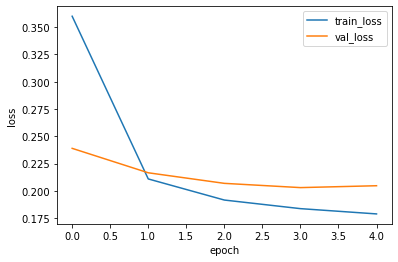

In [24]:
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
sns.lineplot(x='epoch', y ='loss', data =train_history)
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
plt.legend(labels=['train_loss', 'val_loss'])

By looking at the train and validation loss above, I found that it may underfit the data due to the following reasons.

+ The training loss steadily decrease with a negative slope
+ The validation loss decrease with a small negative slope.

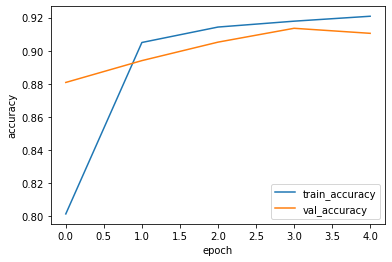

In [25]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
plt.legend(labels=['train_accuracy', 'val_accuracy'])

In [26]:
y_pred = (model.predict(X_test)> 0.5).astype(int)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 584,  131],
       [ 230, 2988]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
label_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

    negative       0.72      0.82      0.76       715
    positive       0.96      0.93      0.94      3218

    accuracy                           0.91      3933
   macro avg       0.84      0.87      0.85      3933
weighted avg       0.91      0.91      0.91      3933



### Conclusion

The accuracy and f1-score is larger than 90%. It is a decent model and I would recomend this based off of this score. 